In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import colour # install from colour-science.org
# from colour.plotting import * # install the accessory modules per colour-science website instructions
%matplotlib inline

Source File Requirments: Spectra begins at 365 nm, ends at 830 nm, and has a spectral resolution of 5 nm.  Data wrangling may be required to generate a conforming file.

In [134]:
Lamp = pd.DataFrame(np.array(pd.read_csv('D:/CW Spectral Eval - Feb 2nd/LE174-H00-N50-2A DOE.csv')))
desr = 'Cool White LED'

In [135]:
# Lamp.head() begins at 365
Lamp = Lamp[1][0:94]
# Lamp.tail() ends at 830 nm
# 5 nm increments
# plt.plot(Lamp[0], Lamp[1]) - checks out OK

In [136]:
def color(filename): 
    xyz = pd.DataFrame(np.array(pd.read_csv('D:\Python_Database\XYZ_Color_Function.csv')))
    X, Y, Z = np.sum(xyz[0:94][1]*filename), np.sum(xyz[0:94][2]*filename), np.sum(xyz[0:94][3]*filename) 
    x, y = X/(X+Y+Z), Y/(X+Y+Z)
    return x, y

In [137]:
def CIE1931(x_coor, y_coor):
    CIE_1931 = pd.DataFrame(np.array(pd.read_csv('D:\Python_Database\CIE1931_1nm.csv')))
    plt.plot(CIE_1931[0], CIE_1931[1], linewidth = 0.5)
    plt.plot(x_coor, y_coor, 'ro', markersize = 10)
#    return CIE_1931_chromaticity_diagram_plot(standalone = False)
    plt.grid()
    plt.xlabel('x'), plt.ylabel('y')
    plt.text(0.4, 0.8, desr)
    plt.gca().set_aspect('equal', adjustable='box') 
    Blackbody = pd.DataFrame(np.array(pd.read_csv('D:/Python_Database/BlackBody_xy.csv')))
    plt.title('1931 CIE Chart')
    plt.plot(Blackbody[0], Blackbody[1], '--', color = 'black', linewidth = 0.5)
    return plt.show()

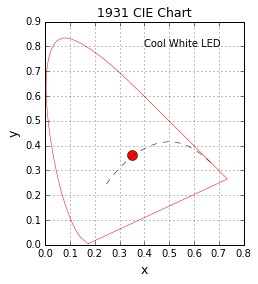

In [138]:
CIE1931(color(Lamp)[0], color(Lamp)[1]) # runs two functions within a function